The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given 
medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. 
There are 768 observations with 8 input variables and 1 output variable

In [84]:
# import basic libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [85]:
# import plot libraries
import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline


In [86]:
# import ml libraries
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [87]:
# categories v1, v4, v8, v9, v11, v12, v16, classLabel
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [88]:
path='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
df=pd.read_csv(path,sep=',')
df.head()
df.columns=['No_of _pregnancy','Plasma_glucose_conce','Diastolic_BP(mm-HG)','triceps_thickness','2-hr-serum insulin',
           'BMI','Diabeteic_predgree_fun','age','class']
df.head()   #1 for diabetes present onset, 0- no oset

,No_of _pregnancy,Plasma_glucose_conce,Diastolic_BP(mm-HG),triceps_thickness,2-hr-serum insulin,BMI,Diabeteic_predgree_fun,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [89]:
df['class'].unique()
y=df['class']
X=df.drop(columns='class')

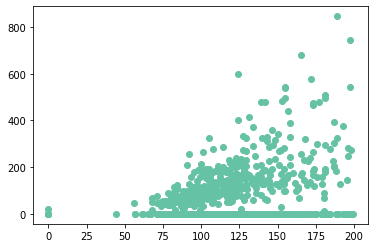

In [133]:
plt.scatter(df['Plasma_glucose_conce'],df['2-hr-serum insulin'])

In [90]:
print('shape=',df.shape)
print(df.isna().sum())

shape= (767, 9)
No_of _pregnancy          0
Plasma_glucose_conce      0
Diastolic_BP(mm-HG)       0
triceps_thickness         0
2-hr-serum insulin        0
BMI                       0
Diabeteic_predgree_fun    0
age                       0
class                     0
dtype: int64


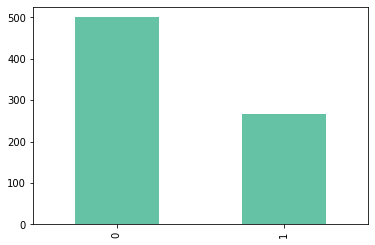

In [91]:
df['class'].value_counts().plot(kind='bar')

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
clf1=DecisionTreeClassifier()
#help(clf)

In [94]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [95]:
y_pred1=clf1.predict(X_test)

In [96]:
accuracy_score(y_test,y_pred1)

0.70995670995671

In [110]:
clf2=RandomForestClassifier()
clf2.fit(X_train,y_train)
clf2.score(X_train,y_train)

0.9850746268656716

In [112]:
y_pred2=clf2.predict(X_test)
accuracy_score(y_test,y_pred2)

0.7445887445887446

In [113]:
confusion_matrix(y_test,y_pred1)

array([[119,  32],
       [ 35,  45]], dtype=int64)

In [114]:
confusion_matrix(y_test,y_pred2)

array([[129,  22],
       [ 37,  43]], dtype=int64)

In [115]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred1)

'              precision    recall  f1-score   support\n\n           0       0.77      0.79      0.78       151\n           1       0.58      0.56      0.57        80\n\n    accuracy                           0.71       231\n   macro avg       0.68      0.68      0.68       231\nweighted avg       0.71      0.71      0.71       231\n'

In [116]:
clf3=LogisticRegression()
clf3

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
clf3.fit(X_train,y_train)
y_pred3=clf3.predict(X_test)
classification_report(y_test,y_pred3)

'              precision    recall  f1-score   support\n\n           0       0.81      0.89      0.85       151\n           1       0.75      0.60      0.67        80\n\n    accuracy                           0.79       231\n   macro avg       0.78      0.75      0.76       231\nweighted avg       0.79      0.79      0.79       231\n'

In [104]:
clf4=SVC()

In [127]:
clf4.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [128]:
pred=clf4.predict(X_test)


In [131]:
accuracy_score(y_test,pred)

0.6536796536796536

In [132]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.65      1.00      0.79       151\n           1       0.00      0.00      0.00        80\n\n    accuracy                           0.65       231\n   macro avg       0.33      0.50      0.40       231\nweighted avg       0.43      0.65      0.52       231\n'